In [1]:
import nltk

In [2]:
# nltk.download_shell()

In [4]:
messages=[line.rstrip() for line in open('SMSSpamCollection')]

In [5]:
len(messages)

5574

In [6]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [8]:
messages[69]

'ham\tI plane to give on this month end.'

In [9]:
#collection of tects is caled corpus
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')
    

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [14]:
import pandas as pd
mails=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','messages'])
mails.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
mails.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
mails.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [17]:
mails['length']=mails.messages.apply(len)
mails.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

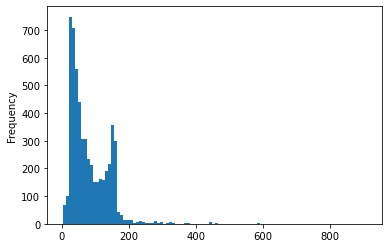

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
mails.length.plot.hist(bins=100)

In [19]:
mails.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [20]:
mails[mails.length==910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

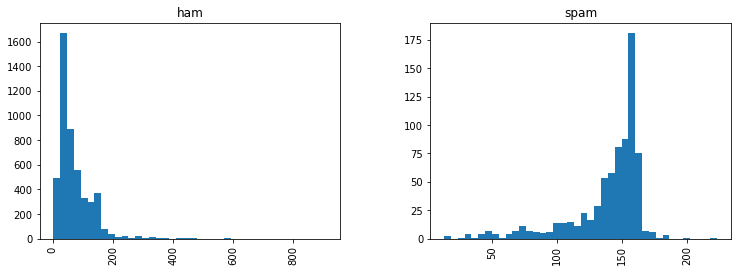

In [21]:
mails.hist(column='length',by='label',bins=40,figsize=(12,4))

In [22]:
# we can infer from above plots that length can be a parameter to separate spam emails



In [23]:
import string
string.punctuation
mess='sample ! no punc :'
no_punc=[k for k in mess if k not in string.punctuation ]
no_punc

['s',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'n',
 'o',
 ' ',
 'p',
 'u',
 'n',
 'c',
 ' ']

In [24]:
from nltk.corpus import stopwords

In [25]:
k=stopwords.words('english')

In [26]:
len(k)

179

In [27]:
nopunc=''.join(no_punc)
nopunc

'sample  no punc '

In [28]:
nopunc.split()

['sample', 'no', 'punc']

In [29]:
cleaned_mess=[word for word in nopunc.split() if word not in k]
cleaned_mess

['sample', 'punc']

In [30]:
def text_editor(mess):
#     """"""
#     1.remove punc
#     2.remove stopwords
#     3.display cleaned text
#     """"""
    nopunc=[c for c in mess if c not in string.punctuation]
    nopunc=''.join(nopunc)
    k=stopwords.words('english')
    return [c for c in nopunc.split() if c.lower() not in k]
    
    

In [31]:
mails.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
mails['messages'].head(5).apply(text_editor)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
#bag of words transformation
bow_transformer=CountVectorizer(analyzer=text_editor).fit(mails['messages'])

In [39]:
print(len(bow_transformer.vocabulary_))
# a total of 11425 unique words are there in total messages

11425


In [40]:
mess4=mails['messages'][3]
mess4

'U dun say so early hor... U c already then say...'

In [41]:
bow4=bow_transformer.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [42]:
# it means that there are only 7 unique words in message 4 after removing punctuations and stop words
bow_transformer.get_feature_names()[9554]


#each work is assigned wi

'say'

In [43]:
bow_transformer.get_feature_names()[4068]

'U'

In [44]:
message_bow=bow_transformer.transform(mails['messages'])

In [45]:
print('shape of sparse matrix :',message_bow.shape)
message_bow

shape of sparse matrix : (5572, 11425)


<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [46]:
# find num of nonzeros in message_bow
message_bow.nnz

50548

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer
#The TF*IDF algorithm is used to weigh a keyword in any content and assign importance to that keyword based 
#on the number of times it appears in the document. More importantly, 
#it checks how relevant the keyword is throughout the web, which is referred to as corpus.

In [48]:
tfidf_transformer=TfidfTransformer().fit(message_bow)

In [49]:
tfidf4=tfidf_transformer.transform(bow4)
print(tfidf4)
# these numbers refers to weights

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [50]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['college']]
# the higher the numerical value , the rarer the term is
# the smaller the numerical value the more common the term

6.986631457954278

In [56]:
messages_tfidf=tfidf_transformer.transform(message_bow)
#https://www.onely.com/blog/what-is-tf-idf/#:~:text=TF*IDF%20is%20used%20by,b)%20Cocaine.

In [57]:
# start detection
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(messages_tfidf,mails['label'])

In [58]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [59]:
all_pred=spam_detect_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [60]:
actual=mails['label']
print(k)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [61]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test=train_test_split(mails['messages'],mails['label'],test_size=.3)

In [75]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_editor))
    ,('tfidf',TfidfTransformer())
    ,('classifier',MultinomialNB())
])

In [76]:
pipeline.fit(msg_train,label_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_editor at 0x0000023342694280>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [79]:
preditions=pipeline.predict(msg_test)
predictions

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_editor at 0x0000023342694280>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [81]:
from sklearn.metrics import classification_report
print(classification_report(label_test,predictions))

TypeError: Expected sequence or array-like, got <class 'sklearn.pipeline.Pipeline'>